In [1]:
from pathlib import Path
from pioneerml.zenml import load_step_output
from pioneerml.zenml import utils as zenml_utils
from pioneerml.zenml.pipelines.training import group_splitter_optuna_pipeline
from pioneerml.data import NODE_LABEL_TO_NAME, NUM_NODE_CLASSES

PROJECT_ROOT = zenml_utils.find_project_root()
zenml_client = zenml_utils.setup_zenml_for_notebook(root_path=PROJECT_ROOT, use_in_memory=True)
print(f"ZenML ready with stack: {zenml_client.active_stack_model.name}")


Using ZenML repository root: /home/jack/python_projects/pioneerML
Ensure this is the top-level of your repo (.zen must live here).
ZenML ready with stack: default


In [2]:
# Configure the pipeline
file_pattern = str(Path(PROJECT_ROOT) / 'data' / 'mainTimeGroups_*.npy')
run = group_splitter_optuna_pipeline.with_options(enable_cache=False)(
    build_datamodule_params={
        'file_pattern': file_pattern,
        'max_files': 1,
        'limit_groups': 1000,
        'min_hits': 3,
        'use_group_probs': False,
        'batch_size': 8,
        'num_workers': None,
        'val_split': 0.15,
        'seed': 42,
    },
    run_hparam_search_params={
        'n_trials': 1,
        'max_epochs': 1,
        'limit_train_batches': 0.4,
        'limit_val_batches': 1.0,
    },
    train_best_model_params={
        'max_epochs': 5,
        'early_stopping': True,
        'early_stopping_patience': 6,
        'early_stopping_monitor': 'val_loss',
        'early_stopping_mode': 'min',
    },
)
print(f"Run name: {run.name}")
print(f"Run status: {run.status}")


Initiating a new run for the pipeline: group_splitter_optuna_pipeline.
Caching is disabled by default for group_splitter_optuna_pipeline.
Using user: default
Using stack: default
  artifact_store: default
  deployer: default
  orchestrator: default
You can visualize your pipeline runs in the ZenML Dashboard. In order to try it locally, please run zenml login --local.
Step build_splitter_datamodule has started.


[build_splitter_datamodule] Auto-detected num_workers: 11 (from 12 CPU cores, using cores-1)
[build_splitter_datamodule] Starting to load data from: /home/jack/python_projects/pioneerML/data/mainTimeGroups_*.npy
[build_splitter_datamodule] Limiting to 1 files (from 11 total files found, max_files=1)
[build_splitter_datamodule] Loaded 777 groups. Building datamodule...
[build_splitter_datamodule] Calling setup(stage='fit')...
[build_splitter_datamodule] Setup complete. Train: 661, Val: 116


[build_splitter_datamodule] Loaded 777 splitter groups from 1 files; pion_hits=284524, muon_hits=61120, mip_hits=386226, total_hits=731870
Step build_splitter_datamodule has finished in 1.519s.
Step run_splitter_hparam_search has started.


[run_splitter_hparam_search] Using GPU: NVIDIA GeForce RTX 5070
[run_splitter_hparam_search] CUDA devices: 1
[run_splitter_hparam_search] Enabled Tensor Core optimization (medium precision)
[run_splitter_hparam_search] Dataset sizes - Train: 661, Val: 116
[run_splitter_hparam_search] Starting Optuna search with 1 trials, 1 epochs per trial...
[I 2025-12-05 12:47:49,082] A new study created in memory with name: no-name-45676767-b3aa-4c14-b26b-e71cce0d459a
[run_splitter_hparam_search] Starting Optuna study...


  0%|          | 0/1 [00:00<?, ?it/s]

[run_splitter_hparam_search] Trial 1/1 starting...
[run_splitter_hparam_search] Trial 1 params: batch_size=16, hidden=150 (from 150), heads=6, layers=3, dropout=0.1002, lr=0.000121, weight_decay=0.000136
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
`Trainer(limit_val_batches=1.0)` was configured so 100% of the batches will be used..
[run_splitter_hparam_search] Trial 1 training 1 epochs...
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name    ┃ Type              ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ model   │ GroupSplitter     │  820 K │ train │     0 │
│ 1 │ loss_fn │ BCEWithLogitsLoss │      0 │ train │     0 │
└───┴─────────┴───────────────────┴────────┴───────┴───────┘

Trainable params: 820 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 820 K                                                                                                
Total estimated model params size (MB): 3                                                                          
Modules in train mode: 53                                                                                          
Modules in eval mode: 0                                                                                            
Total FLOPs: 0

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.


[run_splitter_hparam_search] Trial 1 validating...
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

[run_splitter_hparam_search] Trial 1 completed with score: 0.620386
[run_splitter_hparam_search] Optuna search complete! Best score: 0.620386
[run_splitter_hparam_search] Best params: {'batch_size': 16, 'heads': 6, 'hidden': 150, 'layers': 3, 'dropout': 0.10017169273075897, 'lr': 0.00012053508112643967, 'weight_decay': 0.0001362462241118697}


[I 2025-12-05 12:47:53,140] Trial 0 finished with value: 0.6203858852386475 and parameters: {'batch_size': 16, 'heads': 6, 'hidden': 150, 'layers': 3, 'dropout': 0.10017169273075897, 'lr': 0.00012053508112643967, 'weight_decay': 0.0001362462241118697}. Best is trial 0 with value: 0.6203858852386475.
Step run_splitter_hparam_search has finished in 4.749s.
Step train_best_splitter has started.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores


┏━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name    ┃ Type              ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ model   │ GroupSplitter     │  820 K │ train │     0 │
│ 1 │ loss_fn │ BCEWithLogitsLoss │      0 │ train │     0 │
└───┴─────────┴───────────────────┴────────┴───────┴───────┘

Trainable params: 820 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 820 K                                                                                                
Total estimated model params size (MB): 3                                                                          
Modules in train mode: 53                                                                                          
Modules in eval mode: 0                                                                                            
Total FLOPs: 0

Step train_best_splitter has finished in 11.168s.
Step collect_splitter_predictions has started.
Step collect_splitter_predictions has finished in 1.435s.
Pipeline run has finished in 22.286s.
Run name: group_splitter_optuna_pipeline-2025_12_05-17_47_46_176689
Run status: completed


In [3]:
# Load artifacts from the pipeline run
trained_module = load_step_output(run, "train_best_splitter")
datamodule = load_step_output(run, "build_splitter_datamodule")
predictions = load_step_output(run, "collect_splitter_predictions", index=0)
targets = load_step_output(run, "collect_splitter_predictions", index=1)
best_params = load_step_output(run, "run_splitter_hparam_search")

if trained_module is None or datamodule is None:
    raise RuntimeError("Could not load artifacts from the optuna pipeline run.")

datamodule.setup(stage="fit")
trained_module.eval()
device = next(trained_module.parameters()).device
val_size = len(datamodule.val_dataset) if datamodule.val_dataset is not None else len(datamodule.train_dataset)
print(f"Loaded module on {device}; validation samples: {val_size}")
print("Best params from Optuna:", best_params)
print("Epochs actually run:", getattr(trained_module, "final_epochs_run", None))


Loaded module on cpu; validation samples: 116
Best params from Optuna: {'batch_size': 16, 'heads': 6, 'hidden': 150, 'layers': 3, 'dropout': 0.10017169273075897, 'lr': 0.00012053508112643967, 'weight_decay': 0.0001362462241118697, 'best_score': 0.6203858852386475, 'n_trials': 1} {'batch_size': 16, 'heads': 6, 'hidden': 150, 'layers': 3, 'dropout': 0.10017169273075897, 'lr': 0.00012053508112643967, 'weight_decay': 0.0001362462241118697, 'best_score': 0.6203858852386475, 'n_trials': 1}
Epochs actually run: 6 6


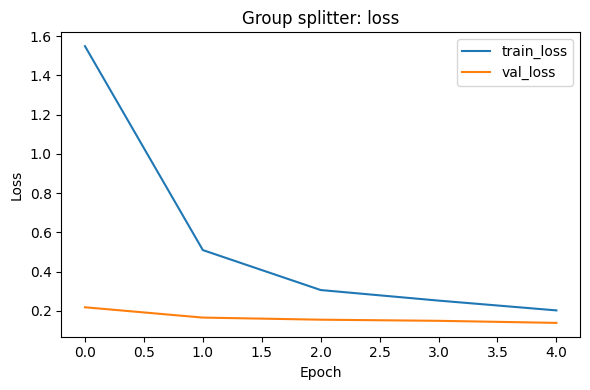

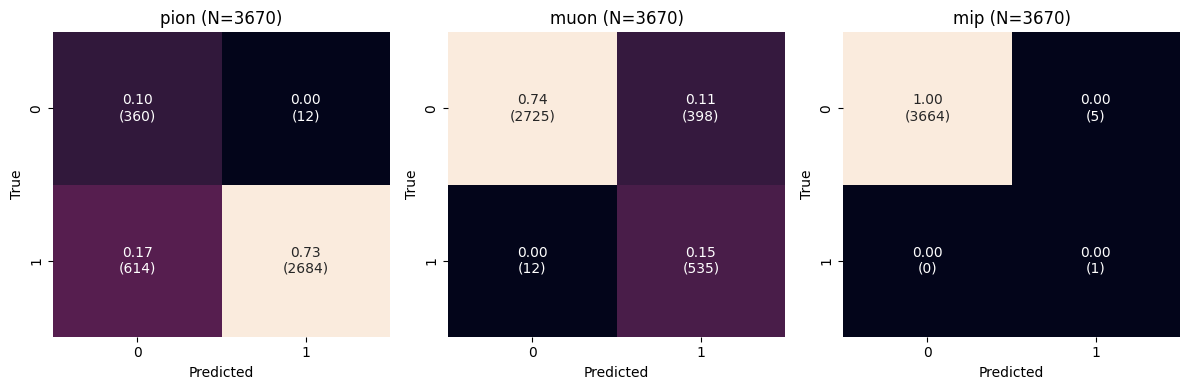

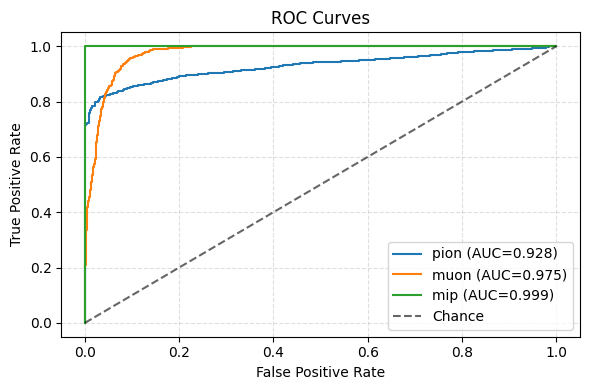

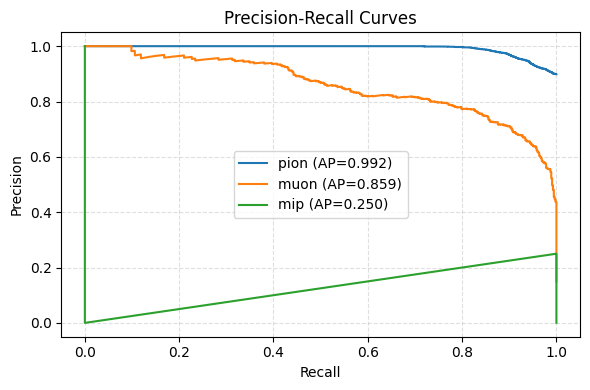

In [4]:
from pioneerml.evaluation.plots import (
    plot_loss_curves,
    plot_multilabel_confusion_matrix,
    plot_precision_recall_curves,
    plot_roc_curves,
)

class_names = list(NODE_LABEL_TO_NAME.values())

# Loss curves
plot_loss_curves(trained_module, title="Group splitter: loss", show=True)

# Classification diagnostics
plot_multilabel_confusion_matrix(
    predictions=predictions,
    targets=targets,
    class_names=class_names,
    threshold=0.5,
    normalize=True,
    show=True,
)
plot_roc_curves(predictions, targets, class_names=class_names, show=True)
plot_precision_recall_curves(predictions, targets, class_names=class_names, show=True)


In [5]:
# Save trained splitter model checkpoint
from datetime import datetime
import torch

ckpt_dir = Path(PROJECT_ROOT) / "trained_models" / "group_splitter"
ckpt_dir.mkdir(parents=True, exist_ok=True)

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
ckpt_path = ckpt_dir / f"group_splitter_{timestamp}.pt"
#torch.save(trained_module.model.state_dict(), ckpt_path)
print(f"Saved checkpoint to {ckpt_path}")


Saved checkpoint to /home/jack/python_projects/pioneerML/trained_models/group_splitter/group_splitter_20251205_124810.pt
